# Movie Lens Project:

   A linear regression project examining what factors predict a movie being past the curve.
   #### A Lawrence and Oreva project for COMP840.
***	



## The Assignment:
Taken from [here](https://mycourses.unh.edu/courses/48074/assignments/306480)
***	


- Must use a Regression technique
- Must use a real data set (not fake data set, i.e. randomly generated numbers) The data set must be at least contain > 10k records. 
- Must have Juypter Notebook Documentation
- Do exploratory data exploration using graphs  (5%)
- Explain tradeoffs made in feature engineering and feature selection. (10%)
- Explain the tradeoffs you made in model selection.<br> 
  Include your model choices and hyper-parameter tuning.  (10%)
- Must explain in detail how you evaluate the accuracy of model (10%)


 From Hands-On Machine Learning with Scikit-Learn and TensorFlow: ""


## The Problem:
***

There's too much data in the Movie Lens Database to be able to make major conclusions about the opinions from people who 
rate movies on the website by a cursory glance-- the review csv is 20 million lines alone! That'll crash most versions of Microsoft Office if not wholly render them useless. 

It hasn't really been established what factors can help predict whether whether MovieLens users would enjoy a movie or dislike it. From what the data shows, MovieLens users are very much male -- a previous data set sampled 6040 users, with an output of around 71% male, aged 30 and a half years old. It would probably be safe to say that these men happen to be [largely white](https://www.latimes.com/entertainment/la-et-entertainment-news-updates-2018-no-surprise-at-all-new-study-says-most-1528730858-htmlstory.html), which is who came to the website to review, so that might be an indicator of what they enjoy. 

Simply put, they're the coveted 18-34 demographic that largely has a lot of disposable income, and we're asking the question: _what do these guys like?_ How will this determine some of our hypotheses? They won't be the same as if we grabbed some guys off the street or your brother/husband/friend etc; this is a subset of guys who think about movies enough to go onto a niche website and contribute their opinions.
    
    
The purpose of this project is to **determine whether MovieLens users would enjoy a movie based on known traits of a movie, pulled in from other 
sources. Simply put, is it over, or under?** 

From sampling over 27k movies, the average score of a movieLens movie is 3.07. Movies will be explored to see whether or not they scored above this threshold.


## The Solution:
***
Use Linear Regression. [Linear Regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a) is the "modeling of a target value based on independent predictors". The value we're looking to obtain is whether the movie scored above or below the median average, the dependent variable, based off of factors such as the genre, awards, year, appearance on lists.

The techniques that we use for this project will be based off the article from Towards Data Science on Medium titled _Introduction to Machine Learning Algorithms: Linear Regression_, where the writer Rohith Gandhi takes the scikit learn library to build a linear regression model.

## The Data: 
***	
The Data we're using is going to be from the small Movie Lens Project when working 
through the samples and establish a basis, and then the large to work with a larger dataset
    
   MongoDB was chosen as the Database Type due to its malleability and ease of use compared to the csv. 
    For instance - an array of items lives on an individual cell when converted to a pandas dataset easier than a 
    CSV file will. Feature engineering is also a little easier to do in MongoDB by setting database keys than on a
    pandas dataset, and lives persistently in a database, but without the tradeoff of the largesse of a relational 
    database, which has its home in another project type.
    
   PyMongo and the Python language in general was chosen as the programming language due to language uniformity. Jupyter 
    Notebook, numpy, and pandas are all very Python friendly -- if not built in Python, and thus to save time, the database
    should be interacted with in Python, as well. Python can strongly parse a csv sheet compared to JavaScript, for 
    instance, which requires that csv be installed via NodeJS.  The code shows that Python is very much a scripting language
    and needs to be refactored to use design patterns and respect DRY -- don't repeat yourself.
    
   This dataset is also an amalgamation of serveral different types of data -- using the id of the movieLens movie, we were
    able to link it to the IMDB id, which gave us functionality through having more robustness of data and more accurate   
    datasets. Some of the other datasets also include .dat and .tsv files, where adding them in before into the database is 
    far easier than parsing at the point of transaction. Given that this set has parsed 20 million reviews into around 25k 
    movies, going with MongoDB was a very wise choice.
    
    The data parsed is as follows:
        users.dat - demographic information to determine that MovieLens skewers younger, and male.
        links.csv - used to get the imdbId of movies, so that other information like the review scores can be 
        scraped/processed.
        movies.csv - a list of all movies titles, ids, and genres.
        ratings.csv - a csv of all ratings, sent to MongoDB using the ID.

## How the Data Was Built:
***


<img src="data_flow.png">

The current flow of the data, including dependencies

## The Properties: 
***
   The Properties currently in use are as follows:
   -  **movieId** ( _string_ ): The Id of the movie, used to link the movie to MovieLens and IMDB. 
   -  **title** ( *string* ): The name of the movie, used to obtain the year of release and a human-friendly title.
   -  **genre** (*List*): The list of genres the movie is identified with.    
   -  **rating** (*List*): A list of floating numbers users have rated this movie.
   -  **average_rating** (*float*): A median review score averaged from ratings from all the users.
   -  **imdbId** (*string*): the ImdbId used to get information from IMDB via datasets or scraping.
   -  **imdbId** (*float*): a median review compiled of all reviews given by imdb users.
   -  **rom_com** (*Boolean*): if movie is a Romantic Comedy/Drama. MovieLens skews male, so these movies may rate low.
   -  **classic_movie** (*Boolean*): checks whether or not the movie was released before 1980.
   -  **release_year** (*Int*): the year the movie was released.
   -  **num_genres** (*Int*): the number of genres the movie has been identified as.
   -  **num_ratings** *(Int*): The number of reviews that have been submitted.

## Building the Code: 
***

In [1]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
import numpy as np


# make import statements to work with mongoDB
# mongoDB will run the data the same way as a csv.
import pymongo
from pymongo import MongoClient
client = MongoClient('mongodb://localhost:27017/')
db = client["movieLens"]
collection = db['movies']

In [2]:
data = pd.DataFrame(list(db.movies.find()))
data.shape
# Build Train and Test values
# df_train = data.iloc
# df_test = data
# Convert values to np array

(18988, 20)

In [3]:
data.keys()

Index(['_id', 'average_rating', 'awards', 'classic_movie', 'formatted_title',
       'genre', 'imdbId', 'imdbId_review', 'imdb_consensus', 'movieId',
       'num_awards', 'num_genres', 'num_ratings', 'over_under', 'release_year',
       'return_document', 'rom_com', 'title', 'top_250', 'upsert'],
      dtype='object')

In [4]:
data = data.drop(columns=["awards", "average_rating", "formatted_title", "rom_com", "upsert", "title", "genre", "num_ratings", "release_year", "_id", "imdbId", "return_document"  ])

In [5]:
data.head()

,classic_movie,imdbId_review,imdb_consensus,movieId,num_awards,num_genres,over_under,top_250
0,0,4.15,1,1,3,5,1,1
1,0,3.45,1,2,0,3,1,0
2,0,3.30,1,3,0,2,1,0
3,0,2.90,0,4,0,3,0,0
4,0,3.00,1,5,0,1,0,0


In [6]:
data.isnull().sum

<bound method DataFrame.sum of        classic_movie  imdbId_review  imdb_consensus  movieId  num_awards  \
0              False          False           False    False       False   
1              False          False           False    False       False   
2              False          False           False    False       False   
3              False          False           False    False       False   
4              False          False           False    False       False   
5              False          False           False    False       False   
6              False          False           False    False       False   
7              False          False           False    False       False   
8              False          False           False    False       False   
9              False          False           False    False       False   
10             False          False           False    False       False   
11             False          False           False    Fa

In [7]:
corr_matrix = data.corr()
corr_matrix["over_under"].sort_values(ascending=False)

over_under        1.000000
imdbId_review     0.578943
imdb_consensus    0.512604
num_awards        0.136144
top_250           0.071195
classic_movie     0.054635
num_genres        0.016224
Name: over_under, dtype: float64

Earlier, data1 initially had only the imdb_consensus, which had a score of a Mean Squared Error of 0.16, and a variance score of 0.34. Let's see what happens if we add some features! Credit to [this post](https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/) for showing us how to make this work!

In [9]:
data1 = data[["imdb_consensus", "num_awards", "top_250", "num_genres",  "over_under"]]
data1.head()

,imdb_consensus,num_awards,top_250,num_genres,over_under
0,1,3,1,5,1
1,1,0,0,3,1
2,1,0,0,2,1
3,0,0,0,3,0
4,1,0,0,1,0


In [10]:
x = data1.drop('over_under', axis=1)
y = data1['over_under'].copy()

In [11]:
type(x)

pandas.core.frame.DataFrame

In [12]:
type(y)

pandas.core.series.Series

In [13]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
movieLens_x_train, movieLens_x_test, movieLens_y_train, movieLens_y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
regr = linear_model.LinearRegression()

In [16]:
regr.fit(movieLens_x_train, movieLens_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.58981942 0.03933741 0.16146801 0.00923493]


In [18]:
movie_y_pred = regr.predict(movieLens_x_test)

ValueError: x and y must be the same size

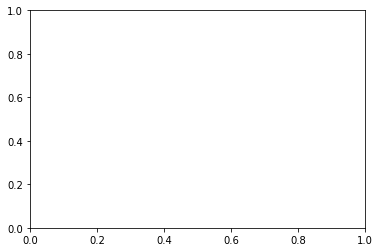

In [19]:
import matplotlib.pyplot as plt
plt.scatter(movieLens_x_test, movieLens_y_test, color='black')
plt.plot(movieLens_x_test, movie_y_pred, color='blue', linewidth=2)
plt.show()

**PrevOld Method:
Mean Squared Error: 0.16
Variance score: 0.34

## Checking the Efficacy of our Model:
***
To check how efficient our model was, we are going to use the Mean Squared Error, which is [the average of the square of the errors](https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/). There is an inverse relationship with the efficacy of the model -- the lower the number, the more effective, the model.

We will also check the variance score -- [how far observered values differ](https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/) from the average of predicted values.

In [20]:
#Print the Mean Squared Error
print("Mean Squared Error: %.2f"
     % mean_squared_error(movieLens_y_test, movie_y_pred))

Mean Squared Error: 0.18


In [21]:
print('Variance score: %.2f' % r2_score(movieLens_y_test, movie_y_pred))

Variance score: 0.26


Ultimately, using the IMDB Consensus is a semi-effective way to see if theres a correlation in a movie being good -- its either that the movies are just plain good, or MovieLens reviewers are IMDB reviewers.

There are some columns that are not going to be necessary here - we will remove these values from the dataframe!`

In [ ]:
# delete bad columns
del data['upsert']

We'll need to see how many rows we have -- according to spec, we're going to need 9k items! Let's delete some rows that don't have any information. 

In [ ]:
# Format data to get rid of NaN Columns, bad data, and irrelevant data
# data = data.dropna(subset=['average_rating', 'genre', 'title'])
columnsTitles= [ 'average_rating', 'num_genres', 'classic_movie', 'num_awards', 'top_250', 'over_under']
data = data.reindex(columns=columnsTitles)
data.head()

In [ ]:
data.shape

##  Feature Engineering and Feature Selection:
***	
**What Determined The Selected Features?**<br>
Time is limited, and the kaggle dataset was sparse -- it had the name of the movie, its id, the genres, and the rating, spread among different csv's. <br><br>

**Features we Ignored or couldn't implement**
***	

*Budget*: Including the budget of the movie adjusted for inflation for 2018 would have been a scraping project -- searching IMDB for the budget of an id, passing it into Mongo, and then using that to determine the budget. This approach didn't account for the indie darlings, and would have required more care beyond the scope of project.<br> <br>
*Director*: Getting something like the director is similar to the issues relating to the budget -- more effort to get involved with, and due to directors releasing duds sometimes, not worth it. <br> <br>
*Golden Raspberry*: The golden raspberry awards are an awards ceremony trafficing in jokes and superlatives for the worst movies. Many of these awards were jokes, and some of the movies that they declared bad, actually became fan favorites later on. Due to the small selection of movies and short amount of time in existence, the Golden Raspberry might not have beneficial.<br> <br>
*FilmStruck*: All the legends from the Turner Classic Movies and Criterion Collection on a now defunct streaming service. Getting these in would involve a combination of string manipulation and website scraping. To assess if this would be worthwhile, movies from the Turner collection were examined for IMDB scores and whether they'd be over or under. Largely, The movies tended to be over, but were not as uniform as the IMDB top 250. Not worth it for the scope of the project vs. the result.<br>

**Features we Implemented**
***	

*Genres*: The number of genres in a movie determines whether or not it's the much maligned "genre film" -- the scholcky horror movie or the derivative action movie, which used to be relegated to the dustbin of history, but thanks to the era of the database, we are haunted with for as long as people care. It seems that having more genres of movies will create a more nuanced movie, making it score over the average. <br> <br>

*Year*: Time is a filter, and movies get forgotten, or had limited runs, or aren't available on video/streaming. So modern audiences can't review them for a database. As a result, newer movies, because they are not lost to the aether, are easier to write bad reviews for. A classic movie is defined as anything before 1980, when Spielberg became very known, and it could be said that the auteur director got reigned in. If the movie year > 1980 , it qualifies as a classic movie <br><br>

*Awards*: Movies that won Oscars are more likely to have scored better than other movies that didn't. Comparing the score of movies that did to movies that didn't will show this.

<br> More information expounding on why we chose certain features will be explained below, with graphs.

## The Visuals:
***	
   **Exploratory Graphs**: We're going to be using some Python libraries in our project for graph visualization

![Picture of Graph Choices](https://cdn-images-1.medium.com/max/1000/1*JxbqIQmD_E3M3I7Tjo0OqA.jpeg)

So from this image, we should be using a Scatter Plot from [this article](https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f)

In [ ]:
# Decide on a chart type.
import matplotlib.pyplot as plt

### Do MovieLens Users Have Nostalgia Goggles?
***
#### _"Yet, perhaps because of all this, there’s an increasing sense that culture has lost the ability to grasp and articulate the present. Or it could be that, in one very important sense, there is no present to grasp and articulate any more."_ -  Mark Fisher, Ghosts of My Life 

A guiding hypothesis can be made that movieLens users may prefer the older aesthetic of older movies, and thus might end up rating older movies higher than the newer ones. For the sake of this study, older movies are going to be defined as the New Hollywood cinema and anything which came before it -- the prevalence of the spaghetti Western, the big musicals, the weird French cinema, and so on, and so on. 

With the advent of Spielberg, Lucas, Ridley Scott and many others who wrote film in a more universal language and decoupled meaning from regional restraints and relation -- similar to how a MongoDB isn't relational like MySQL, these movies work in a different paradigm. 

### Scatter Plot of Genre Numbers vs Score:
***
    To see if theres a relationship between the number of genres and the score of a movie, 
    a scatter plot will be created.

In [ ]:
# set the x and y data to genres and score.
y_data = data["average_rating"]
x_data = data["num_genres"]
y_label = "Average Rating"
x_label = "Number of Genres"
title = "Comparing the number of genres"
def scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False):
    _, ax = plt.subplots()
    
    ax.scatter(x_data, y_data, s = 3, color = color, alpha = 0.75)
    
    if yscale_log == True:
        ax.set_yscale('log')
        
    # label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False)  

**Output**: From what I can see, theres, a strong correlation between having more genres, 
            and the rating the movie gets. 

### Does MovieLens hate RomComs? 
***
    Here, we will test whether the assumption that romantic comedies are rated lower than other 
    movies holds water.

In [ ]:
# set the x and y data to genres and score

x_data = data["rom_com"]
y_data = data["average_rating"]
x_label = "is it a RomCom"
y_label = "what did it score?"
title = "Does the largely male MovieLens hate Romantic Comedy?"
def scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False):
    _, ax = plt.subplots()
    
    ax.scatter(x_data, y_data, s = 3, color = color, alpha = 0.75)
    
    if yscale_log == True:
        ax.set_yscale('log')
        
    # label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False)  


It doesn't entirely prove that they do, but Romantic Comedy scores slightly lower than the other genres as a whole 2.98 vs 3.09

### Are the Top 250 movies highly regarded here? 
***
The IMDB movies are very highly rated and regarded as some of the best of the best when it comes to the popular movie.They change -- movies come and go, the sentiments of the user changes-- but they act as a bellwether and can [sound an alarm](https://www.streamingobserver.com/netflix-35-movies-imdb-top-250/) when they aren't readily available on streaming services. 

In [ ]:
# set the x and y data to imdb and score

x_data = data["top_250"]
y_data = data["average_rating"]
x_label = "is it Top 250"
y_label = "how'd it do?"
title = "Is the IMDB Top 250 worthwhile?"

def scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False):
    _, ax = plt.subplots()
    
    ax.scatter(x_data, y_data, s = 3, color = color, alpha = 0.75)
    
    if yscale_log == True:
        ax.set_yscale('log')
        
    # label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False)

### What about Oscars? 
***
People bemoan the politics and nepotism of the oscars, and how they don't often pick the best movies -- how did Forrest Gump beat Pulp Fiction AND The Shawshank Redemption in 1995, how did Crash beat Brokeback Mountain, Munich, AND Capote in 2006? Well... It's the opinions of a bunch of old guys who award things based off esoteric factors nobody knows. That being said, let's check if putting sand in your eyes and proclaming yourself the Oracle works (certainly what they do).

In [ ]:
x_data = data["num_awards"]
y_data = data["average_rating"]
x_label = "Number of Awards"
y_label = "how'd it do?"
title = "Do oscars matter?"

def scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False):
    _, ax = plt.subplots()
    
    ax.scatter(x_data, y_data, s = 3, color = color, alpha = 0.75)
    
    if yscale_log == True:
        ax.set_yscale('log')
        
    # label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterplot(x_data, y_data, x_label, y_label, title, color="r", yscale_log=False)

## Doing the experiment 
***

### Choosing a model
***
Because Simple linear regression requires *using only one feature, it is not applicable for this project*. Many of the examples in sklearn are based off [single feature 2D plots](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html), so they are not applicable for this portion.<br>

Resultantly, we will use a multiple linear regression model. 


In [ ]:
data.head()

In [ ]:
data.dropna()

In [ ]:
data.head()
data.shape

In [ ]:
# divide into attributes and labels.
# X = [[data["num_awards"]], [data["num_genres"]], [data["classic_movie"]], [data["top_250"]]]
X = [data["top_250"]]
X = np.array(X)
# (4, 18988)
y = [data["over_under"]]
y = np.array(y)
# y = y.reshape((1,18988, 1))
# (1, 18988)
regr = linear_model.LinearRegression()
regr.fit(X, y)
# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)
# we are predicting the rating, based off the genre, year, awards, imdb
# fit the data 
    # fit(X, y, sample_weight=None)
    # score
y.shape

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

### Isotonic Regression
***

Isotonic Regression is creating a free-form line to be as close to observations as it can possibly be without being forced into the graph like an overfitted model. 

In [ ]:
# isotonic regression https://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html#sphx-glr-auto-examples-plot-isotonic-regression-py
# a fit so you don't have to worry about data being non linear -- might help lol

In [ ]:
#KBinsDiscretizer
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html#sphx-glr-auto-examples-preprocessing-plot-discretization-py


In [ ]:
# https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/
# https://datascience.stackexchange.com/questions/31614/which-parameters-are-hyper-parameters-in-a-linear-regression
# https://scikit-learn.org/stable/modules/grid_search.html


Explain the tradeoffs you made in model selection.<br> 
  Include your model choices and hyper-parameter tuning.  (10%)
- Must explain in detail how you evaluate the accuracy of model (10%)

### Special thanks to:
***
[Rohith Gandhi](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a) and his Linear Regression article.

Mark Fisher, for inspiring our take on nostalgia.
